In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from plotly.offline import init_notebook_mode
import re
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
import spacy

tqdm.pandas()
spacy_eng = spacy.load("en_core_web_sm")
nltk.download('stopwords')
lemm = WordNetLemmatizer()
init_notebook_mode(connected=True)
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['font.size'] = 18

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
!unzip /content/Sarcasm_Headlines_Dataset.json.zip

Archive:  /content/Sarcasm_Headlines_Dataset.json.zip
  inflating: Sarcasm_Headlines_Dataset.json  


In [11]:
!unzip /content/Sarcasm_Headlines_Dataset_v2.json.zip

Archive:  /content/Sarcasm_Headlines_Dataset_v2.json.zip
  inflating: Sarcasm_Headlines_Dataset_v2.json  


In [12]:
data1 = pd.read_json('/content/Sarcasm_Headlines_Dataset.json', lines=True)
data2 = pd.read_json('/content/Sarcasm_Headlines_Dataset_v2.json', lines=True)

In [13]:
data1.head(5)

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [14]:
data2.head(5)

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [15]:
data1 = data1[['headline','is_sarcastic']]
data2 = data2[['headline','is_sarcastic']]

data = pd.concat([data1,data2])
data.reset_index(drop=True, inplace=True)


In [16]:
data1.head(5)

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [17]:
data2.head(5)

,headline,is_sarcastic
0,thirtysomething scientists unveil doomsday clo...,1
1,dem rep. totally nails why congress is falling...,0
2,eat your veggies: 9 deliciously different recipes,0
3,inclement weather prevents liar from getting t...,1
4,mother comes pretty close to using word 'strea...,1


In [18]:
data

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0
...,...,...
55323,jews to celebrate rosh hashasha or something,1
55324,internal affairs investigator disappointed con...,1
55325,the most beautiful acceptance speech this week...,0
55326,mars probe destroyed by orbiting spielberg-gat...,1


In [19]:
data.isnull().sum()

headline        0
is_sarcastic    0
dtype: int64

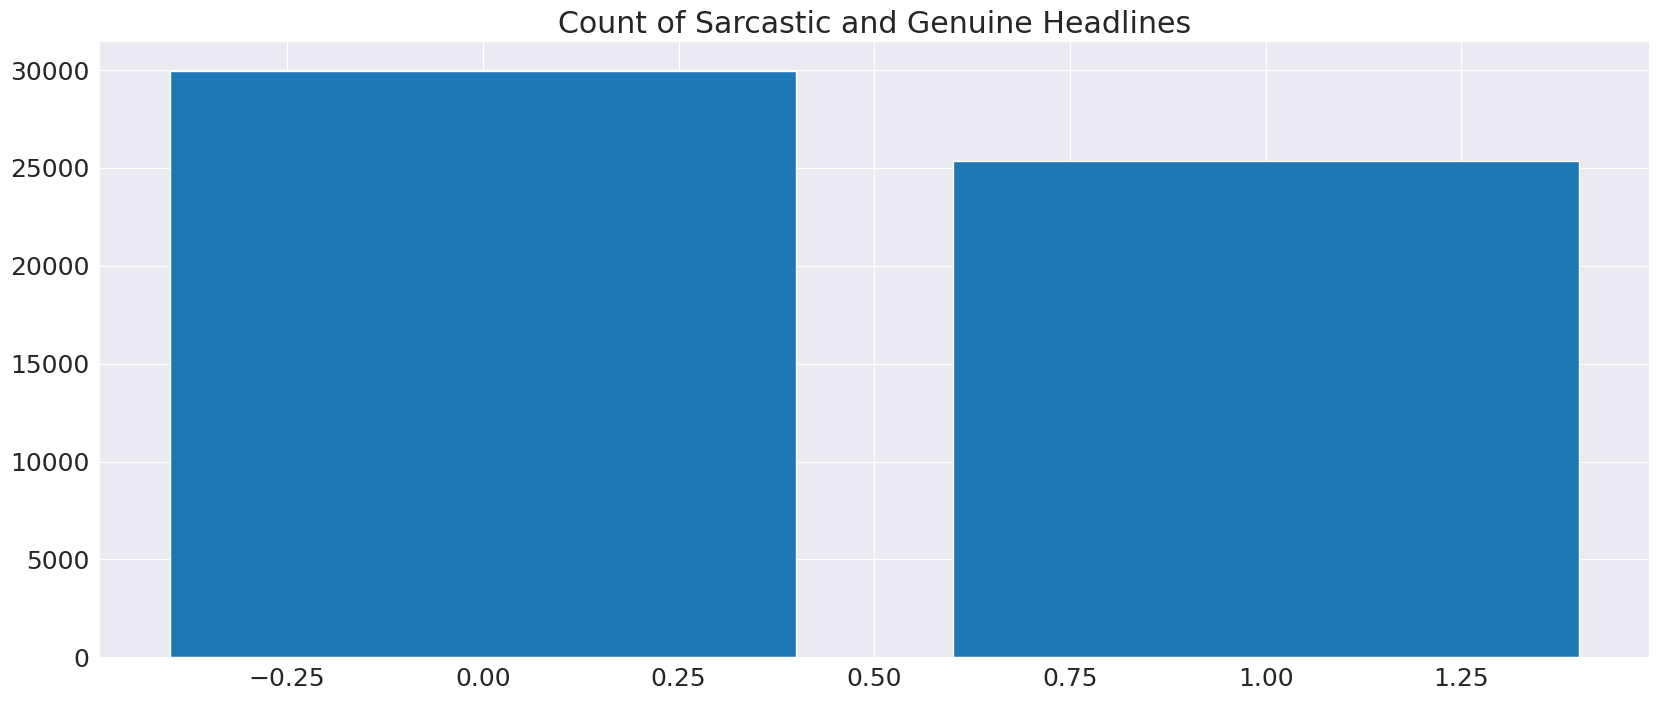

In [23]:
import matplotlib.pyplot as plt

data_grouped = data.groupby('is_sarcastic').count().reset_index()
plt.bar(data_grouped['is_sarcastic'], data_grouped['headline'])
plt.title('Count of Sarcastic and Genuine Headlines')
plt.show()


Finding Class Balance

Special Characters Removal

In [24]:
stop_words = set(stopwords.words("english"))
lemm = WordNetLemmatizer()

def text_cleaning(x):
    # Remove extra whitespaces and newlines
    headline = re.sub('\s+\n+', ' ', x)
    # Replace non-alphanumeric characters with a space
    headline = re.sub('[^a-zA-Z0-9]', ' ', x)
    # Convert to lowercase
    headline = headline.lower()
    # Split the text into a list of words
    headline = headline.split()

    # Lemmatize each word, remove stopwords, and join them back into a string
    headline = [lemm.lemmatize(word, "v") for word in headline if not word in stop_words]
    headline = ' '.join(headline)

    return headline

In [25]:
def get_entities(x):
    entity = []
    text = spacy_eng(x)
    for word in text.ents:
        entity.append(word.label_)
    return ",".join(entity)

data['entity'] = data['headline'].progress_apply(get_entities)


100%|██████████| 55328/55328 [06:15<00:00, 147.18it/s]


In [26]:
data.head(5)

,headline,is_sarcastic,entity
0,former versace store clerk sues over secret 'b...,0,
1,the 'roseanne' revival catches up to our thorn...,0,
2,mom starting to fear son's web series closest ...,1,
3,"boehner just wants wife to listen, not come up...",1,
4,j.k. rowling wishes snape happy birthday in th...,0,PERSON


In [27]:
data.head(10)

,headline,is_sarcastic,entity
0,former versace store clerk sues over secret 'b...,0,
1,the 'roseanne' revival catches up to our thorn...,0,
2,mom starting to fear son's web series closest ...,1,
3,"boehner just wants wife to listen, not come up...",1,
4,j.k. rowling wishes snape happy birthday in th...,0,PERSON
5,advancing the world's women,0,
6,the fascinating case for eating lab-grown meat,0,
7,"this ceo will send your kids to school, if you...",0,
8,top snake handler leaves sinking huckabee camp...,1,ORG
9,friday's morning email: inside trump's presser...,0,"DATE,TIME"


In [29]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [30]:
data['clean_headline'] = data['headline'].apply(text_cleaning)

In [31]:
data['sentence_length'] = data['clean_headline'].apply(lambda x: len(x.split()))
data

,headline,is_sarcastic,entity,clean_headline,sentence_length
0,former versace store clerk sues over secret 'b...,0,,former versace store clerk sue secret black co...,10
1,the 'roseanne' revival catches up to our thorn...,0,,roseanne revival catch thorny political mood b...,8
2,mom starting to fear son's web series closest ...,1,,mom start fear son web series closest thing gr...,9
3,"boehner just wants wife to listen, not come up...",1,,boehner want wife listen come alternative debt...,9
4,j.k. rowling wishes snape happy birthday in th...,0,PERSON,j k rowling wish snape happy birthday magical way,9
...,...,...,...,...,...
55323,jews to celebrate rosh hashasha or something,1,"NORP,PERSON",jews celebrate rosh hashasha something,5
55324,internal affairs investigator disappointed con...,1,,internal affairs investigator disappoint consp...,8
55325,the most beautiful acceptance speech this week...,0,"DATE,NORP",beautiful acceptance speech week come queer ko...,7
55326,mars probe destroyed by orbiting spielberg-gat...,1,,mar probe destroy orbit spielberg gate space p...,8


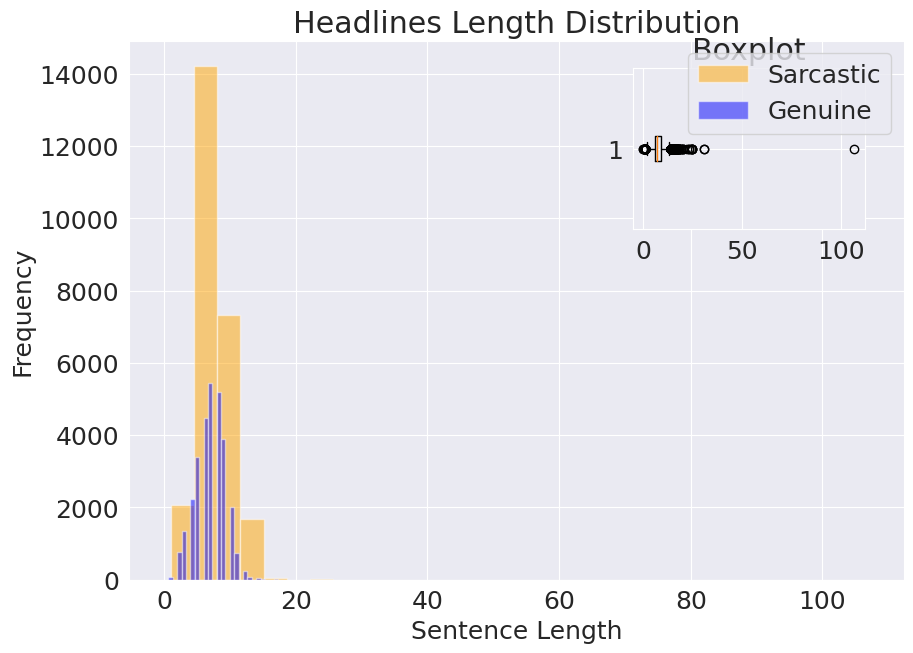

In [37]:


# Assuming 'sentence_length' is a column in your 'data' DataFrame
# If it's not, you should replace it with the correct column name or calculation.

# Filter data for sarcastic and genuine headlines
sarcastic_data = data[data['is_sarcastic'] == 1]
genuine_data = data[data['is_sarcastic'] == 0]

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 7))

# Plot histograms for sarcastic and genuine headlines
ax1.hist(sarcastic_data['sentence_length'], bins=30, alpha=0.5, label='Sarcastic', color='orange')
ax1.hist(genuine_data['sentence_length'], bins=30, alpha=0.5, label='Genuine', color='blue')

# Add title and labels
ax1.set_title('Headlines Length Distribution')
ax1.set_xlabel('Sentence Length')
ax1.set_ylabel('Frequency')

# Add a legend
ax1.legend()

# Create a boxplot as a marginal plot
ax2 = ax1.inset_axes([0.65, 0.65, 0.3, 0.3])
ax2.boxplot(data['sentence_length'], vert=False)
ax2.set_title('Boxplot')

# Show the plot
plt.show()


In [38]:
data[data['sentence_length']==107]['headline']

34011    hot wheels ranked number one toy for rolling d...
Name: headline, dtype: object

In [39]:
data.drop(data[data['sentence_length'] == 107].index, inplace = True)
data.reset_index(inplace=True, drop=True)

In [41]:
data['contains_number'] = data['clean_headline'].apply(lambda x: bool(re.search(r'\d+', x)))
data

,headline,is_sarcastic,entity,clean_headline,sentence_length,contains_number
0,former versace store clerk sues over secret 'b...,0,,former versace store clerk sue secret black co...,10,False
1,the 'roseanne' revival catches up to our thorn...,0,,roseanne revival catch thorny political mood b...,8,False
2,mom starting to fear son's web series closest ...,1,,mom start fear son web series closest thing gr...,9,False
3,"boehner just wants wife to listen, not come up...",1,,boehner want wife listen come alternative debt...,9,False
4,j.k. rowling wishes snape happy birthday in th...,0,PERSON,j k rowling wish snape happy birthday magical way,9,False
...,...,...,...,...,...,...
55322,jews to celebrate rosh hashasha or something,1,"NORP,PERSON",jews celebrate rosh hashasha something,5,False
55323,internal affairs investigator disappointed con...,1,,internal affairs investigator disappoint consp...,8,False
55324,the most beautiful acceptance speech this week...,0,"DATE,NORP",beautiful acceptance speech week come queer ko...,7,False
55325,mars probe destroyed by orbiting spielberg-gat...,1,,mar probe destroy orbit spielberg gate space p...,8,False


In [42]:
data[(data['contains_number']) & (data['sentence_length']<=5) & (data['entity']=='DATE')].sample(10)

,headline,is_sarcastic,entity,clean_headline,sentence_length,contains_number
41453,meet your 2014 hot dog hero,0,DATE,meet 2014 hot dog hero,5,True
54845,mindfulness in your 20s: lessons i learned fro...,0,DATE,mindfulness 20s lessons learn hitchhiker,5,True
27495,a guide to sex at 50 and beyond,0,DATE,guide sex 50 beyond,4,True
17120,making inequality the center of the 2016 debate,0,DATE,make inequality center 2016 debate,5,True
54088,3-day weekend practically already over,1,DATE,3 day weekend practically already,5,True
28648,here's what is coming to amazon in april 2018,0,DATE,come amazon april 2018,4,True
12747,10 days that shook the regressive world,0,DATE,10 days shake regressive world,5,True
34879,"news roundup for march 14, 2017",0,DATE,news roundup march 14 2017,5,True
29756,starting college: a guide for parents in 2014,0,DATE,start college guide parent 2014,5,True
6670,3-day weekend practically already over,1,DATE,3 day weekend practically already,5,True


In [43]:
data[(data['contains_number']) & (data['sentence_length']<=5) & (data['entity']=='TIME')].sample(10)

,headline,is_sarcastic,entity,clean_headline,sentence_length,contains_number
48247,jcpenney abandons 45-second sale,1,TIME,jcpenney abandon 45 second sale,5,True
25695,oven preheated for 16 seconds,1,TIME,oven preheat 16 second,4,True
38867,oven preheated for 16 seconds,1,TIME,oven preheat 16 second,4,True
14477,jcpenney abandons 45-second sale,1,TIME,jcpenney abandon 45 second sale,5,True
40164,"it's just 15 minutes to a grown-up, but not to...",0,TIME,15 minutes grow kid,4,True
32084,novelty alarm clock not so funny at 7 a.m.,1,TIME,novelty alarm clock funny 7,5,True
29670,"how to be nicer, healthier and more focused in...",0,TIME,nicer healthier focus 15 minutes,5,True
6650,23-hour suicide watch a failure,1,TIME,23 hour suicide watch failure,5,True
6296,novelty alarm clock not so funny at 7 a.m.,1,TIME,novelty alarm clock funny 7,5,True
10929,man turns vegetarian for 36 hours,1,TIME,man turn vegetarian 36 hours,5,True


In [44]:
data[(data['contains_number']) & (data['sentence_length']<=5) & (data['entity']=='CARDINAL')].sample(10)

,headline,is_sarcastic,entity,clean_headline,sentence_length,contains_number
33372,5 signs you should be eating more carbs (really!),0,CARDINAL,5 sign eat carbs really,5,True
24681,the 1-800 cases come to philly,0,CARDINAL,1 800 case come philly,5,True
13308,panicked er doctor calls 911,1,CARDINAL,panic er doctor call 911,5,True
36764,4 steps to a younger-looking neck,0,CARDINAL,4 step younger look neck,5,True
52960,'98 camaros test higher than owners,1,CARDINAL,98 camaros test higher owners,5,True
25777,8 ways fitness changed my life,0,CARDINAL,8 ways fitness change life,5,True
27356,23 incredible benefits of getting more sleep,0,CARDINAL,23 incredible benefit get sleep,5,True
2286,5 resistance resolutions,0,CARDINAL,5 resistance resolutions,3,True
33951,finding comfort in the wake of 9/11,0,CARDINAL,find comfort wake 9 11,5,True
51970,senator's myspace top 8 all corporations,1,CARDINAL,senator myspace top 8 corporations,5,True


In [45]:
sarcastic = data[data['is_sarcastic']==1]['clean_headline'].tolist()
genuine = data[data['is_sarcastic']==0]['clean_headline'].tolist()

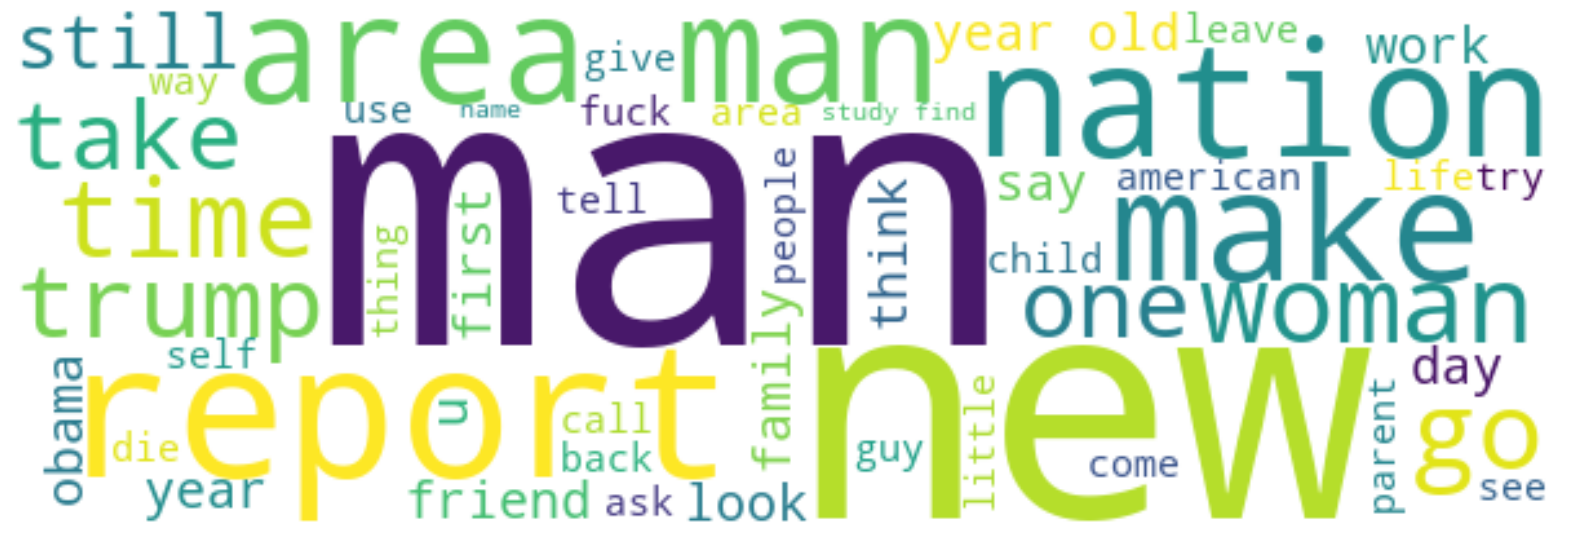

In [46]:
wordcloud = WordCloud(max_words=50, width=600, background_color='white').generate(" ".join(sarcastic))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

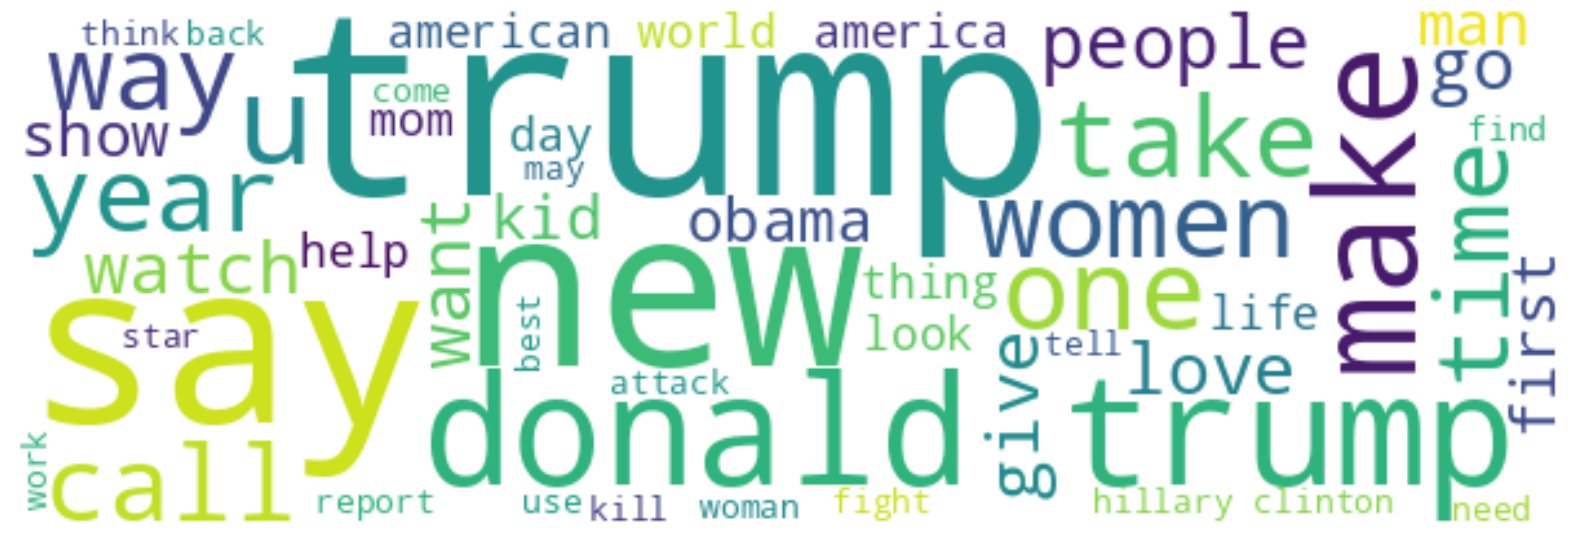

In [47]:
wordcloud = WordCloud(max_words=50, width=600, background_color='white').generate(" ".join(genuine))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [48]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, Layer, Dense, Dropout, MultiHeadAttention, LayerNormalization, Input, GlobalAveragePooling1D
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [49]:
sentences = data['clean_headline']
label = data['is_sarcastic']

In [50]:
X_train, X_val, y_train, y_val = train_test_split(sentences, label, test_size=0.2, stratify=label, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, stratify=y_val, random_state=42)

In [51]:
max_len = 20
oov_token = '00_V'
padding_type = 'post'
trunc_type = 'post'

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1
print("Vocab Size: ",vocab_size)


Vocab Size:  20879


In [52]:
train_sequences = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(train_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

val_sequences = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(val_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(test_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

Multi headed attention

In [53]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, heads, neurons):
        super(TransformerEncoder, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=heads, key_dim=embed_dim)
        self.ffn = Sequential(
            [layers.Dense(neurons, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(0.5)
        self.dropout2 = layers.Dropout(0.5)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [54]:
embed_dim = 50
heads = 2
neurons = 32
maxlen = 20
vocab_size = 20886

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerEncoder(embed_dim, heads, neurons)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = Dropout(0.35)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = Model(inputs=inputs, outputs=outputs)

In [55]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0003), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 token_and_position_embeddi  (None, 20, 50)            1045300   
 ng (TokenAndPositionEmbedd                                      
 ing)                                                            
                                                                 
 transformer_encoder (Trans  (None, 20, 50)            23832     
 formerEncoder)                                                  
                                                                 
 global_average_pooling1d (  (None, 50)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dropout_2 (Dropout)         (None, 50)                0     

In [56]:
model_name = "model.h5"
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0.001, patience = 1, verbose = 1)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=3,
                                            verbose=1,
                                            factor=0.2,
                                            min_lr=0.00000001)

In [57]:
history = model.fit(X_train,y_train,
                    validation_data=(X_val,y_val),
                    epochs=25,
                    batch_size=32,
                    callbacks=[earlystopping])

Epoch 1/25
1384/1384 [==============================] - 41s 27ms/step - loss: 0.4698 - accuracy: 0.7644 - val_loss: 0.3279 - val_accuracy: 0.8556
Epoch 2/25
1384/1384 [==============================] - 33s 24ms/step - loss: 0.2516 - accuracy: 0.9013 - val_loss: 0.2611 - val_accuracy: 0.8973
Epoch 3/25
1384/1384 [==============================] - 33s 24ms/step - loss: 0.1753 - accuracy: 0.9351 - val_loss: 0.2447 - val_accuracy: 0.9151
Epoch 4/25
1384/1384 [==============================] - 34s 24ms/step - loss: 0.1245 - accuracy: 0.9561 - val_loss: 0.2275 - val_accuracy: 0.9241
Epoch 5/25
1384/1384 [==============================] - 33s 24ms/step - loss: 0.0873 - accuracy: 0.9706 - val_loss: 0.2259 - val_accuracy: 0.9353
Epoch 6/25
1384/1384 [==============================] - 34s 25ms/step - loss: 0.0615 - accuracy: 0.9802 - val_loss: 0.2599 - val_accuracy: 0.9378
Epoch 6: early stopping


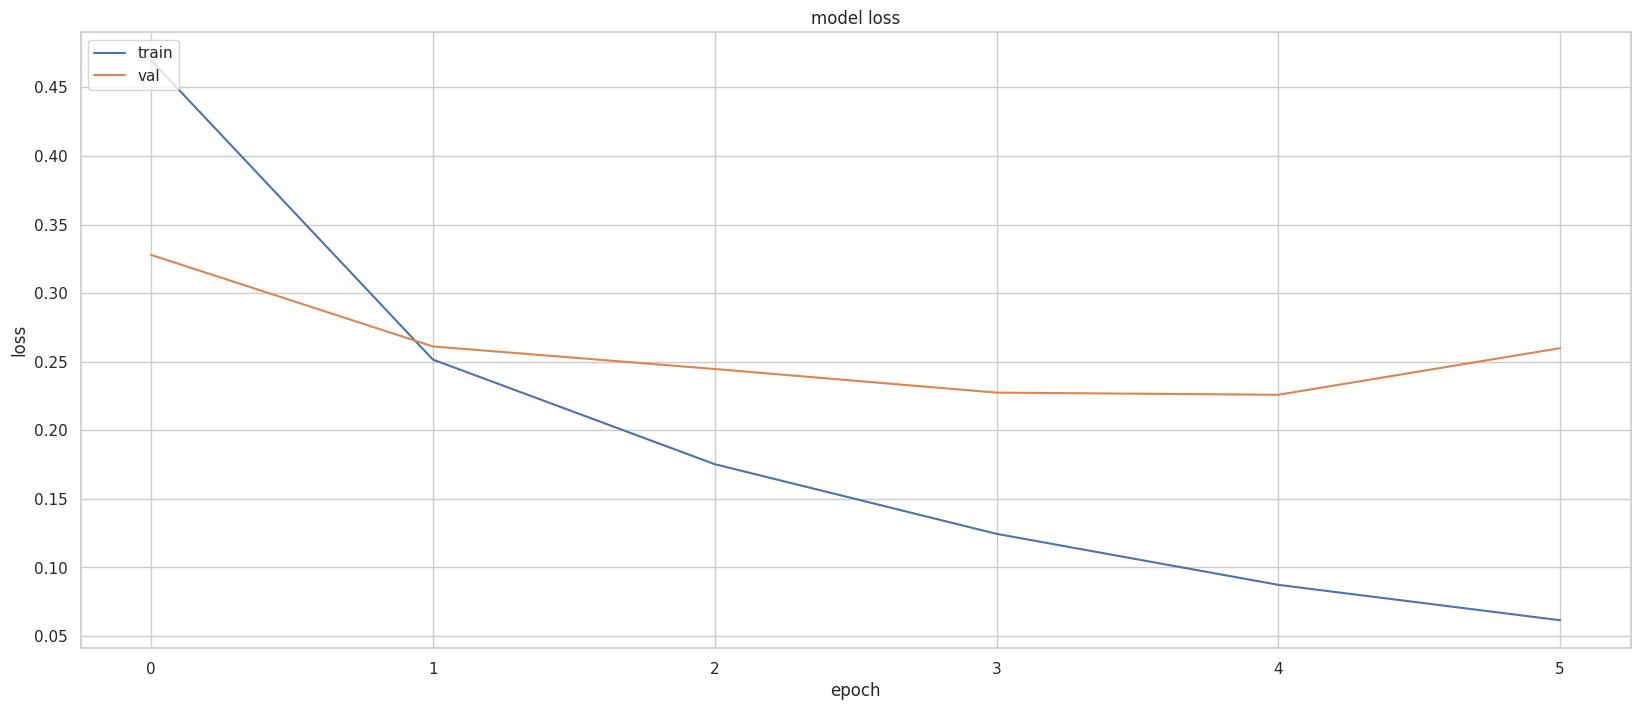

In [58]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

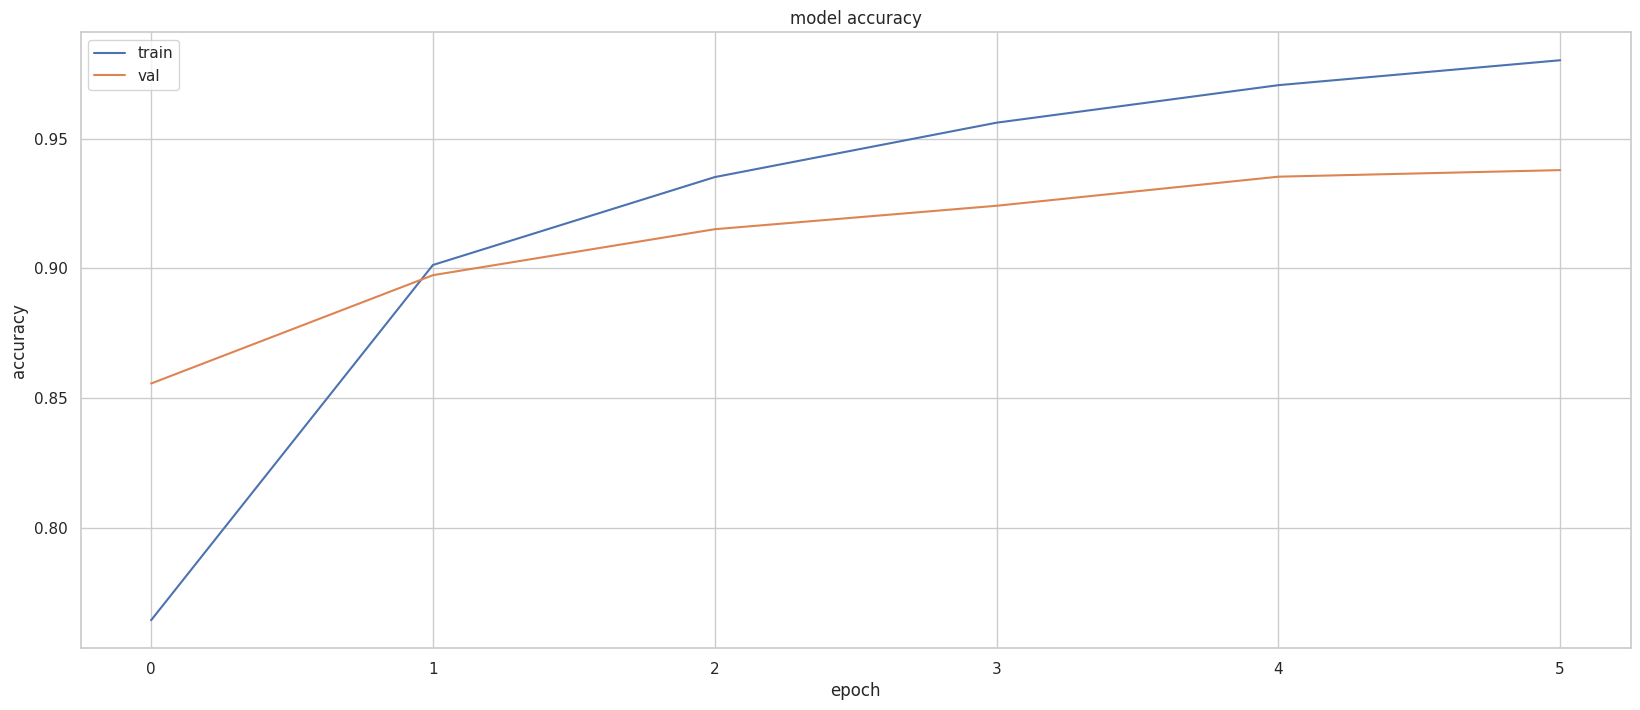

In [59]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

173/173 [==============================] - 1s 7ms/step


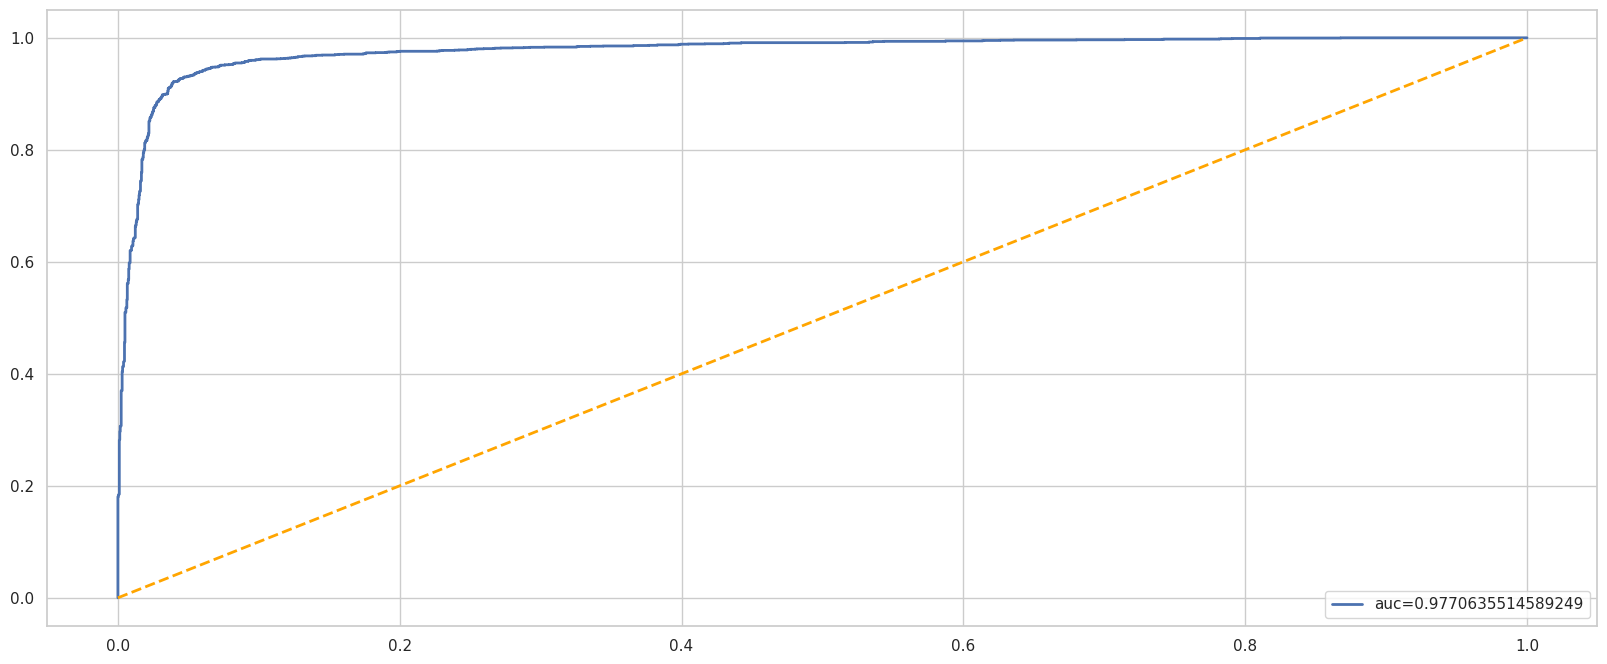

In [61]:
y_pred = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="auc="+str(auc),lw=2)
plt.plot([0, 1], [0, 1], color="orange", lw=2, linestyle="--")
plt.legend(loc=4)
plt.show()

In [62]:
y_pred[y_pred>=0.85] = 1
y_pred[y_pred<0.85] = 0

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2997
           1       0.95      0.92      0.94      2536

    accuracy                           0.94      5533
   macro avg       0.94      0.94      0.94      5533
weighted avg       0.94      0.94      0.94      5533



<Axes: >

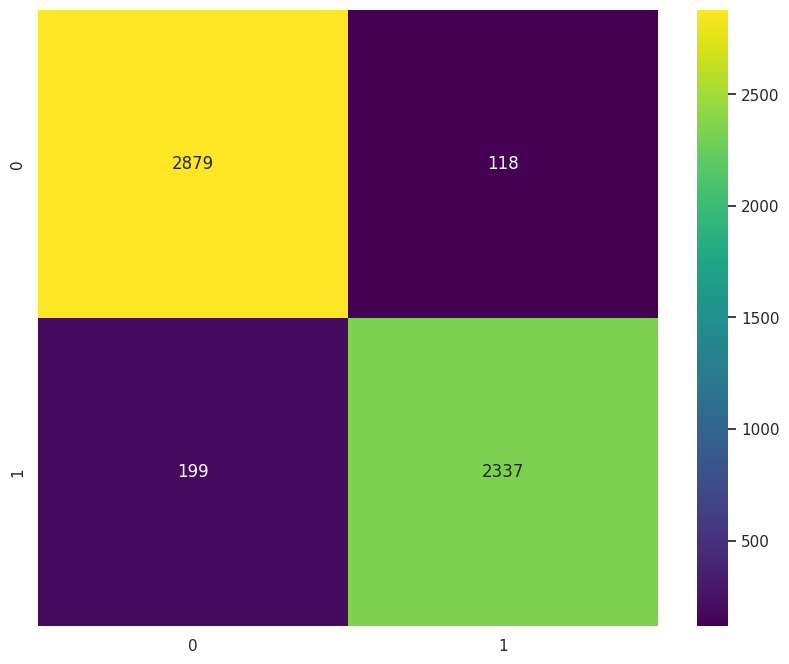

In [63]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.4g',cmap='viridis')